# Loading libraries

In [24]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Data bases loading

In [45]:
xtrain = pd.read_csv("X_train.csv", sep = ",") 
xtrain.head()

,Unnamed: 0,Year,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,...,science_q10_total_timing,science_q11_total_timing,science_q12_total_timing,science_q13_total_timing,science_q14_total_timing,science_q15_total_timing,science_q16_total_timing,science_q17_total_timing,science_q18_total_timing,science_q19_total_timing
0,384002,2022,NLD,528.0,52800132.0,52801144.0,08MS,52800,NLD06,5280000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1118072,2018,QAZ,31.0,3100106.0,3100424.0,07MS,3100,QAZ0101,310000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,845454,2018,FRA,250.0,25000010.0,25005207.0,07MS,25000,FRA0101,2500000,...,87686.5,13164.75,1187.199951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1728613,2015,QES,971.0,97100240.0,97127584.0,06MS,72400,ESP1633,7241600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1083243,2018,PHL,608.0,60800071.0,60802698.0,07MS,60800,PHL0011,6080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172086 entries, 0 to 1172085
Columns: 307 entries, Unnamed: 0 to science_q19_total_timing
dtypes: float64(300), int64(4), object(3)
memory usage: 2.7+ GB


In [17]:
ytrain = pd.read_csv("y_train.csv", sep = ",") 
ytrain.head()

,Unnamed: 0,MathScore
0,384002,116.975422
1,1118072,73.387560
2,845454,0.000000
3,1728613,0.000000
4,1083243,113.750718


In [88]:
ytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172086 entries, 0 to 1172085
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1172086 non-null  int64  
 1   MathScore   1172086 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 17.9 MB


In [13]:
xtest=pd.read_csv("X_test.csv", sep=",")
xtest.head()

,Unnamed: 0,Year,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,...,science_q10_total_timing,science_q11_total_timing,science_q12_total_timing,science_q13_total_timing,science_q14_total_timing,science_q15_total_timing,science_q16_total_timing,science_q17_total_timing,science_q18_total_timing,science_q19_total_timing
0,412660,2022,PER,604.0,60400217.0,60404519.0,08MS,60400,PER03,6040000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,554658,2022,ARE,784.0,78400570.0,78413993.0,08MS,78401,ARE41,7840000,...,182597.5,271476.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,937138,2018,JOR,400.0,40000074.0,40001505.0,07MS,40000,JOR9797,4000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,752986,2018,CHL,152.0,15200099.0,15204046.0,07MS,15200,CHL0203,1520000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1084508,2018,PHL,608.0,60800098.0,60801563.0,07MS,60800,PHL0002,6080000,...,11491.5,31846.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
xtest.shape

(586044, 307)

# EDA (Exploration Data Analysis)

## Missing values

### On ytrain

In [38]:
# percentage of missing_values per column
miss_percent = (ytrain.isna().sum() / len(ytrain)) * 100
miss_percent[miss_percent > 0]

columns_na

Series([], dtype: float64)

We don't have any NA on our ytrain

### On xtrain

<Axes: >

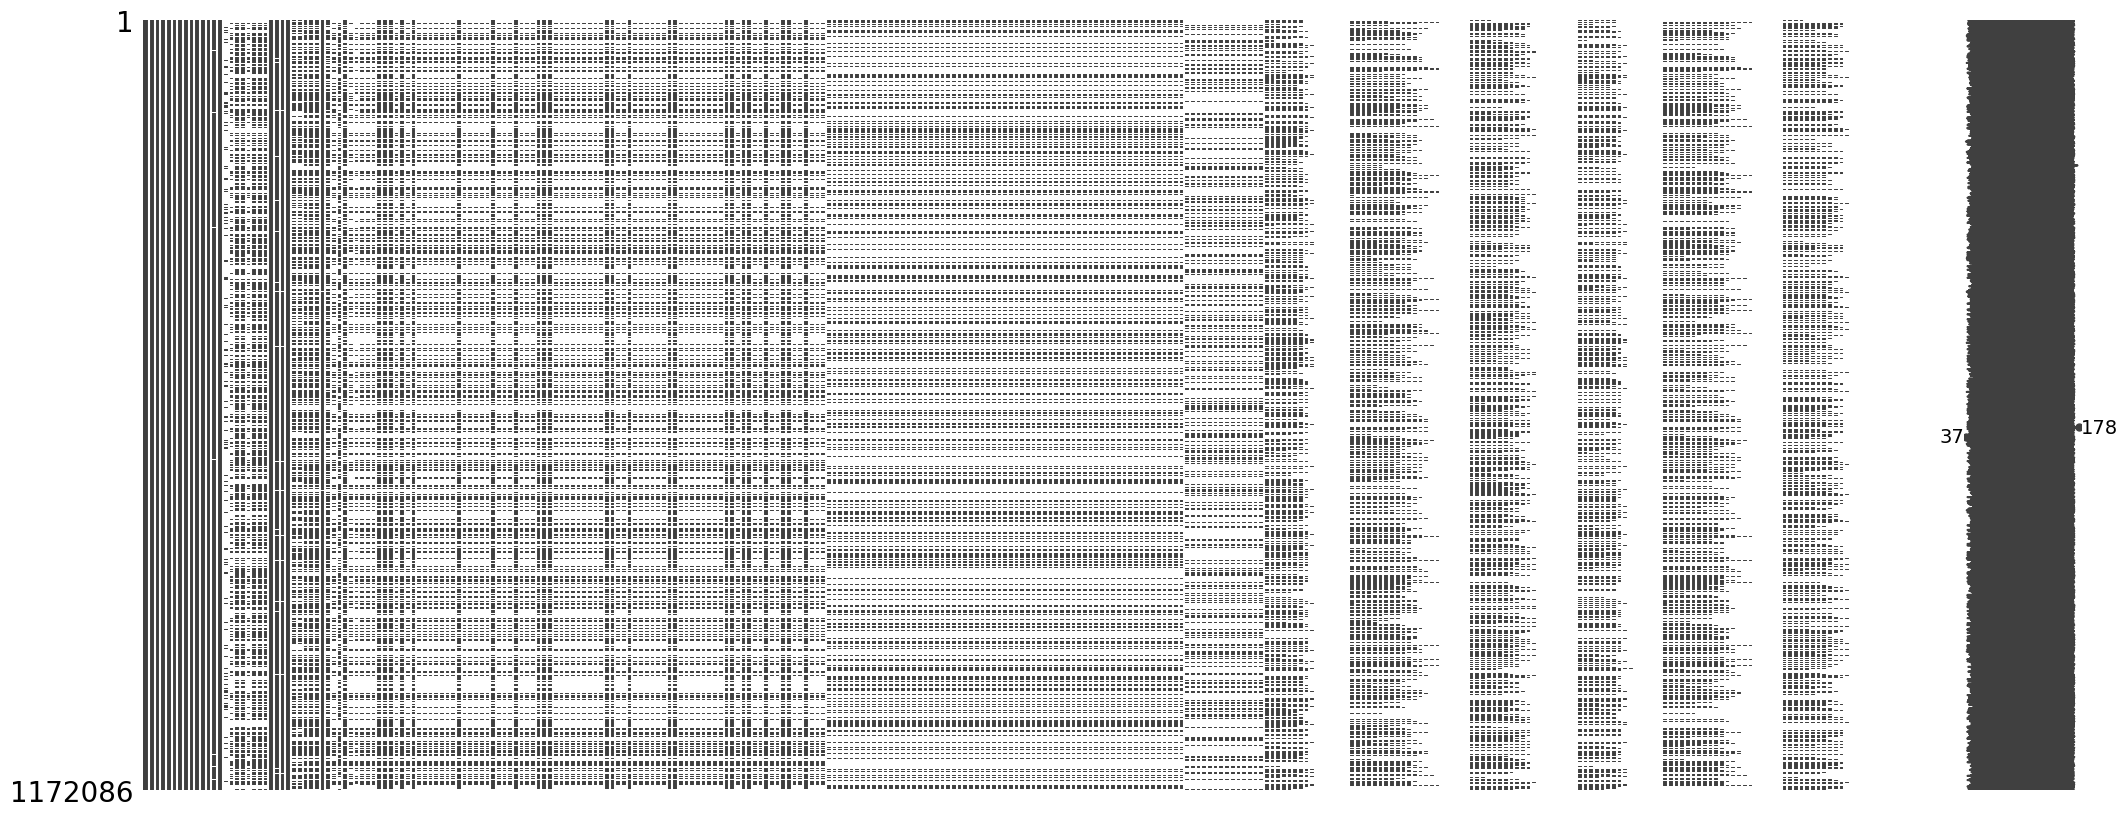

In [23]:
msno.matrix(xtrain)

Variables with 100% of NA

In [ ]:
count_null = xtrain.isna().sum()
list(count_null[count_null == len(xtrain)].index)

['math_q18_average_score',
 'math_q19_average_score',
 'math_q20_average_score',
 'math_q21_average_score',
 'math_q21_total_timing']

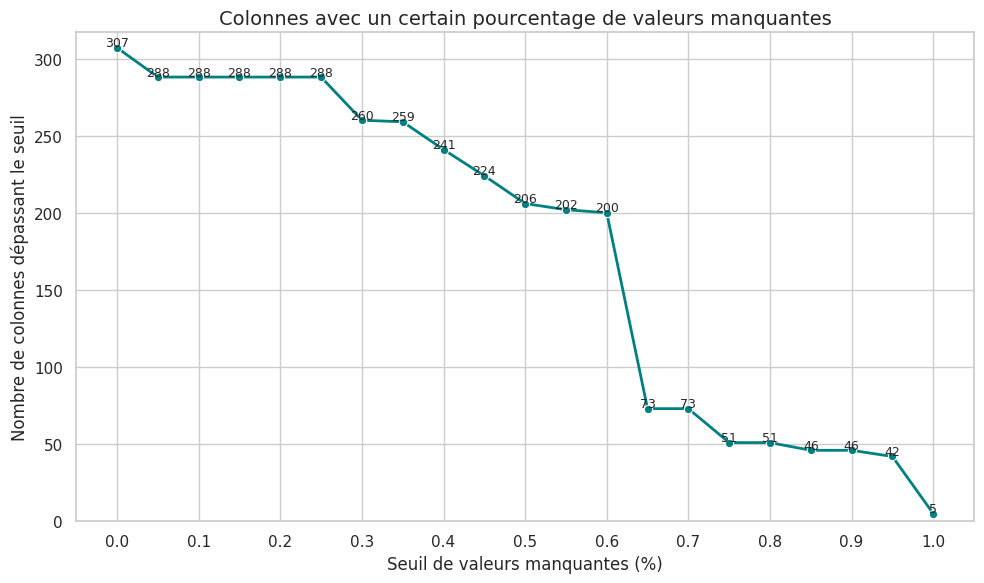

In [ ]:
import matplotlib.pyplot as plt
# Seuils de 0 à 1 avec pas de 0.05
thresholds = np.arange(0, 1.05, 0.05)

# Stocker le nombre de colonnes dépassant chaque seuil
num_columns_exceeding = [(count_null >= t * len(xtrain)).sum() for t in thresholds]

# Figure
plt.figure(figsize=(10,6))
sns.lineplot(x=thresholds, y=num_columns_exceeding, marker='o', color='teal', linewidth=2)

# Ajouter des annotations pour les points
for x, y in zip(thresholds, num_columns_exceeding):
    if y > 0:  # pour ne pas surcharger
        plt.text(x, y + 1, str(y), ha='center', fontsize=9)

plt.xlabel("Seuil de valeurs manquantes (%)", fontsize=12)
plt.ylabel("Nombre de colonnes dépassant le seuil", fontsize=12)
plt.title("Colonnes avec un certain pourcentage de valeurs manquantes", fontsize=14)
plt.xticks(np.arange(0, 1.05, 0.1))
plt.ylim(0, max(num_columns_exceeding)+10)
plt.tight_layout()
plt.show()



We will drop variables with at least 95% of NA and some other variables like '_total_timing', '_average_score', 'CNTRYID', 'CNTSTUID', 'BOOKID'

In [127]:
kept_cols = list(count_null[count_null < 0.65* len(xtrain)].index)

exclude_substrings = ['_total_timing', '_average_score', 'CNTRYID', 'CNTSTUID', 'BOOKID']

final_cols = [col for col in kept_cols if not any(substr in col for substr in exclude_substrings)]

xtrain1= xtrain[final_cols]
xtrain1.shape

(1172086, 178)

<Axes: >

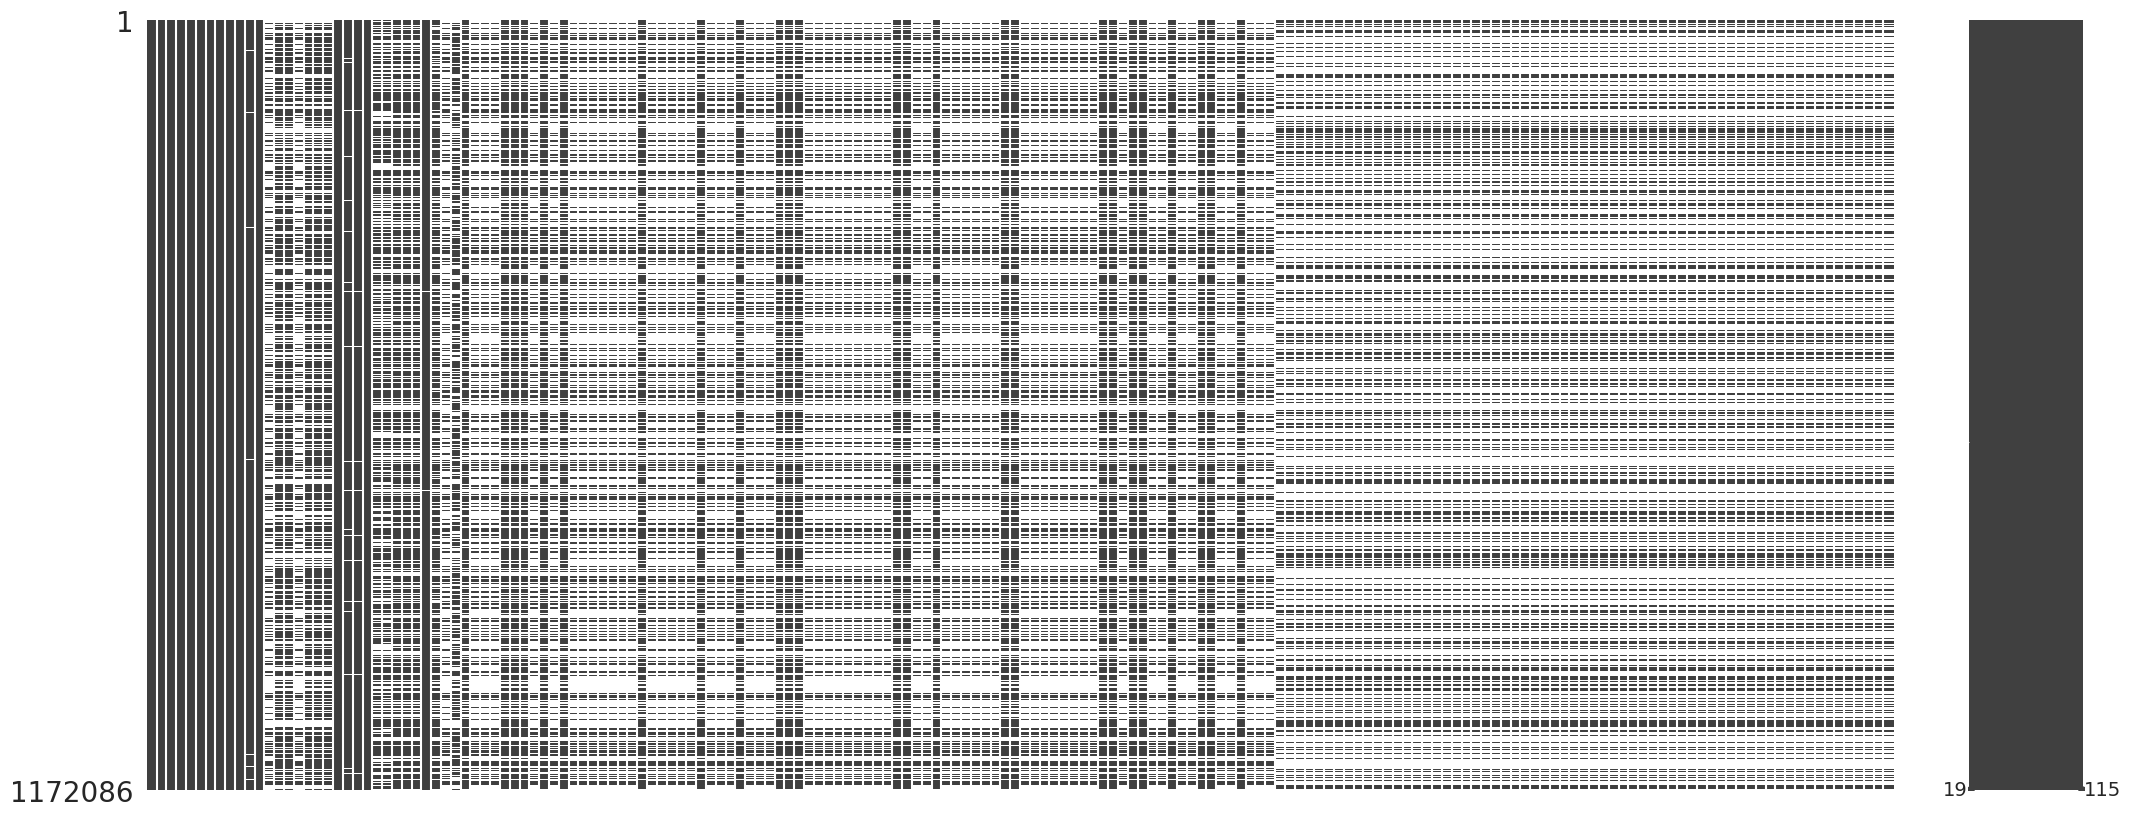

In [129]:
msno.matrix(xtrain1)

<Axes: >

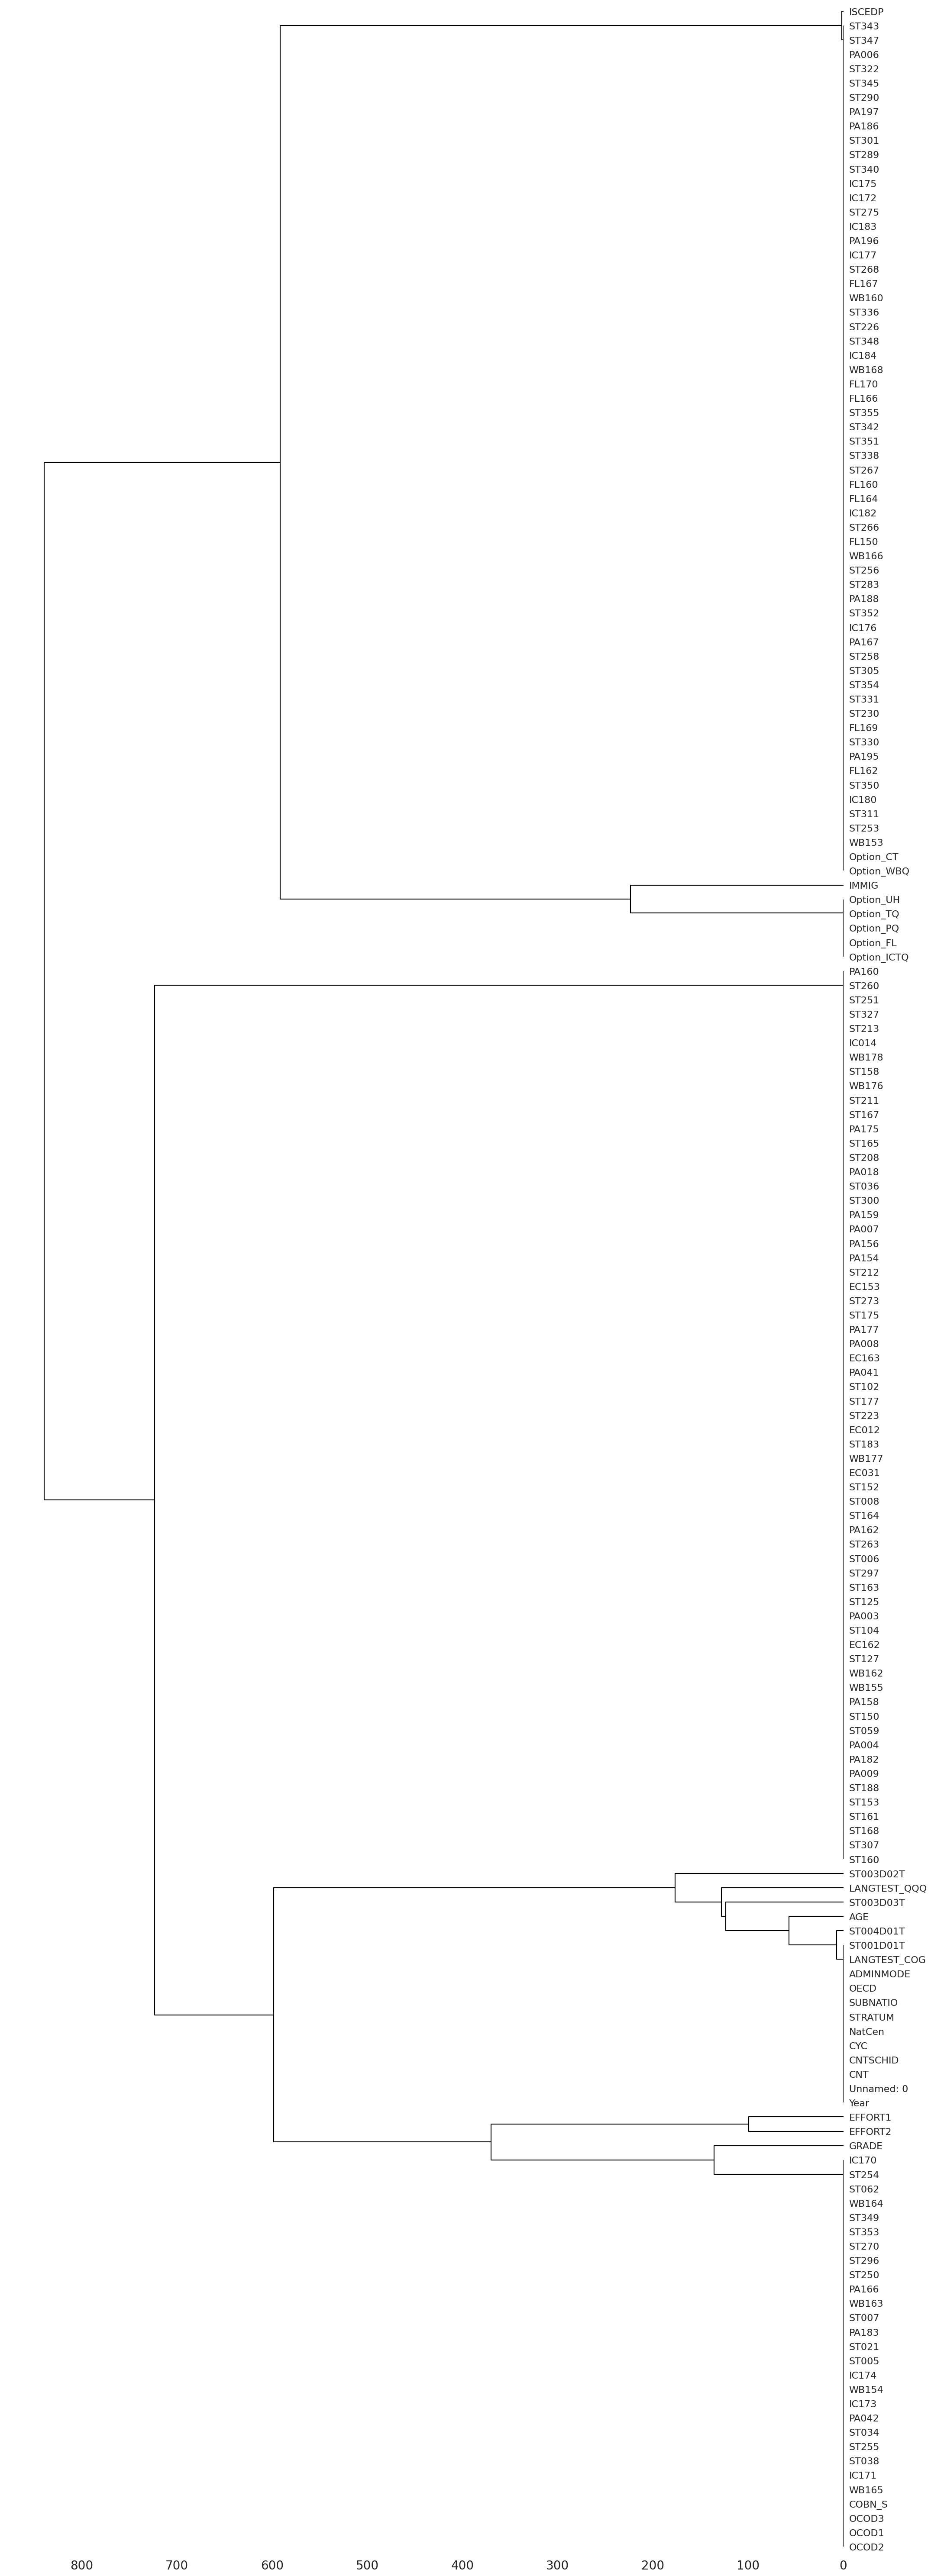

In [128]:
msno.dendrogram(xtrain1)

Let's check if the last variables of our msno matrix are correlated with our target variable.

In [119]:
cols_of_interest = [
    'PA160', 'ST260', 'ST251', 'ST327', 'ST213', 'IC014', 'WB178', 'ST158', 
    'WB176', 'ST211', 'ST167', 'PA175', 'ST165', 'ST208', 'PA018', 'ST036',
    'ST300', 'PA159', 'PA007', 'PA156', 'PA154', 'ST212', 'EC153', 'ST273',
    'ST175', 'PA177', 'PA008', 'EC163', 'PA041', 'ST102', 'ST177', 'ST223',
    'EC012', 'ST183', 'WB177', 'EC031', 'ST152', 'ST008', 'ST164', 'PA162',
    'ST263', 'ST006', 'ST297', 'ST163', 'ST125', 'PA003', 'ST104', 'EC162',
    'ST127', 'WB162', 'WB155', 'PA158', 'ST150', 'ST059', 'PA004', 'PA182', 
    'PA009', 'ST188', 'ST153', 'ST161', 'ST168', 'ST307', 'ST160', 'MathScore'
]
df1 = df[cols_of_interest].copy()
corr_matrix = df1.corr()
# Corrélation avec math_score
corr_with_math = corr_matrix['MathScore'].sort_values(ascending=False)
list(corr_with_math)


[1.0,
 0.12727007245398672,
 0.09276766638312794,
 0.08415163209968748,
 0.07526011753225548,
 0.07371552629983326,
 0.06789399367737597,
 0.05854032162857083,
 0.05457378761719932,
 0.05391944972266218,
 0.051239968997495194,
 0.049852437783068665,
 0.04762994982482802,
 0.0460458401399354,
 0.04424222723257049,
 0.043272356444476585,
 0.03874908444472997,
 0.03817549645293704,
 0.03805180535687689,
 0.036503921880288295,
 0.03529827601835354,
 0.03439200384543153,
 0.03383422864223497,
 0.030903169153016757,
 0.024342127890979857,
 0.023983322203110984,
 0.023627898570161194,
 0.022011929804539546,
 0.021601099272556483,
 0.020907850451227804,
 0.020269899874462642,
 0.018890541618529058,
 0.018508153167463397,
 0.016505613195494758,
 0.016012126748592124,
 0.01579253129145008,
 0.014903999003224486,
 0.01418829365015491,
 0.013643792217840898,
 0.010026965281059492,
 0.006573023333744153,
 0.005302716689666704,
 0.004321303130757929,
 -0.00010938903671924481,
 -0.00192746379076767,


Correlations with our target variable are low so we will drop these variables from our train set

In [133]:
cols_to_remove = [col for col in cols_of_interest if col != 'MathScore']
xtrain1 = xtrain1.drop(columns=cols_to_remove)
xtrain1.shape

(1172086, 115)

<Axes: >

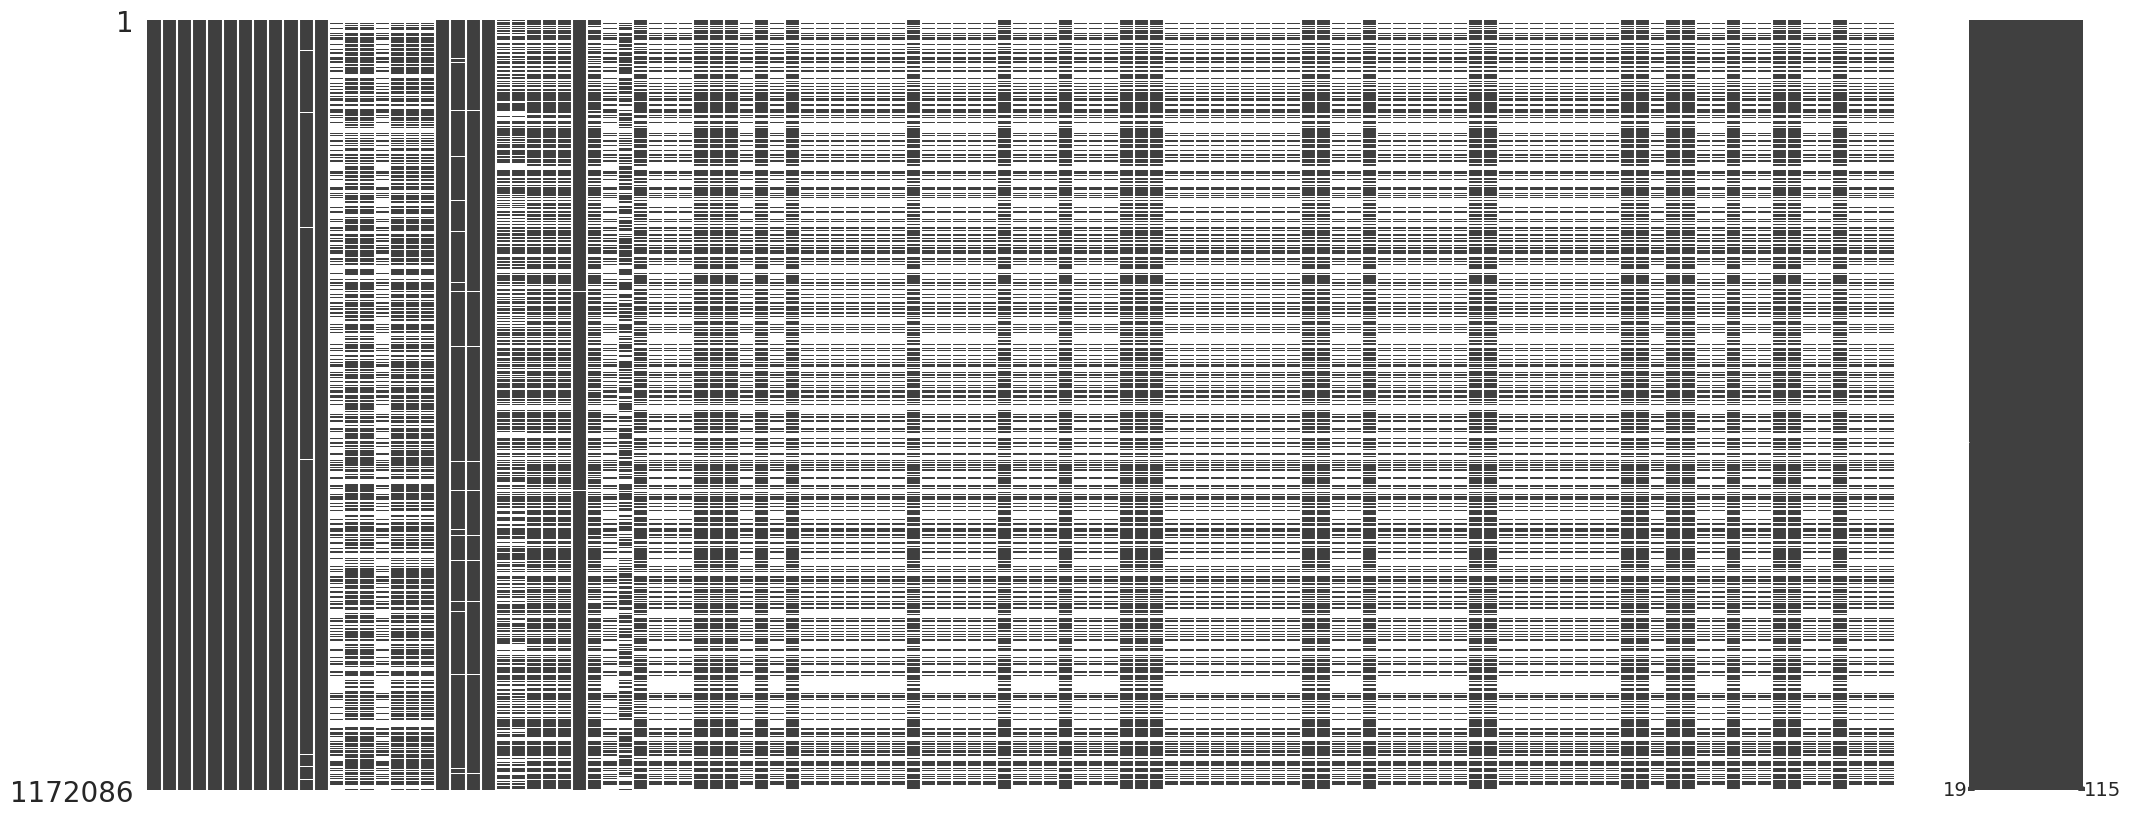

In [134]:
msno.matrix(xtrain1)

<Axes: >

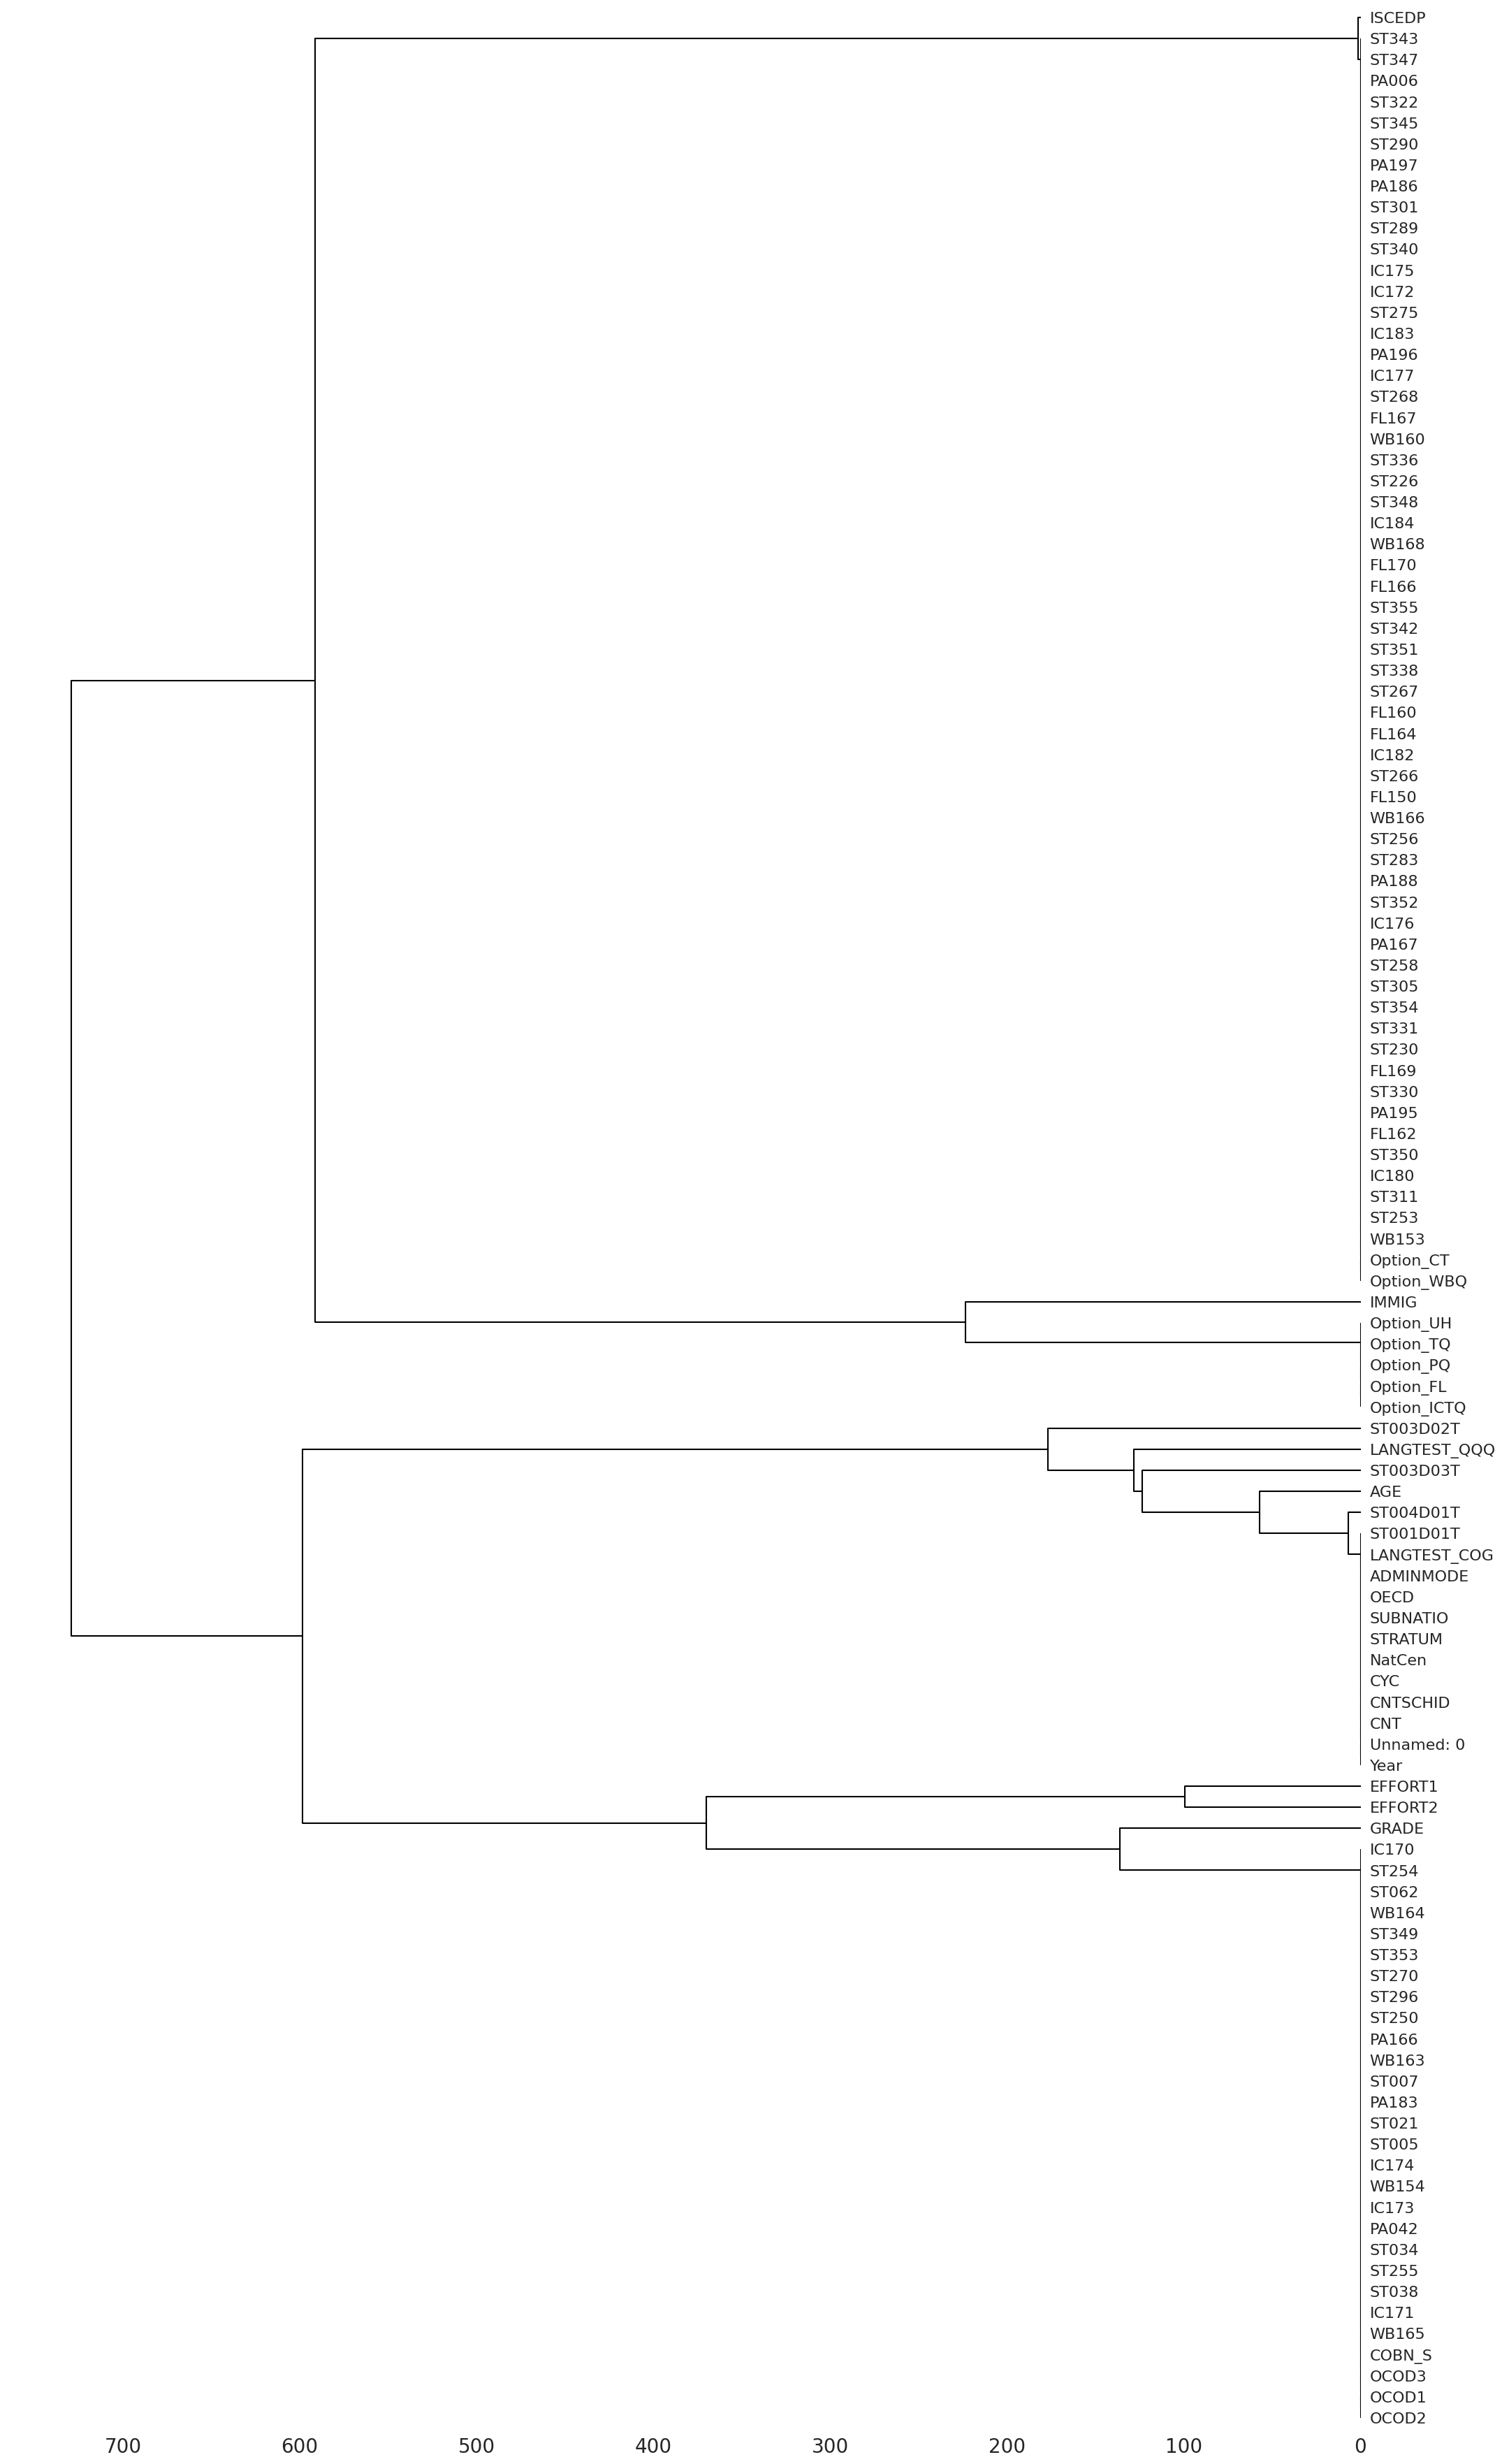

In [135]:
msno.dendrogram(xtrain1)

## Categorical variables

In [91]:
# Select object or categorical dtype columns
cat_cols = xtrain1.select_dtypes(include=['int64','object']).columns
print(cat_cols)

Index(['Unnamed: 0', 'Year', 'CNT', 'CYC', 'NatCen', 'SUBNATIO'], dtype='object')


## Numerical variables